In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Correcting the headers lists: each column name should be a separate string within the list.
df1_headers = [
    "Station_ID", "Date_Time", "altimeter_set_1", "air_temp_set_1", "relative_humidity_set_1",
    "wind_speed_set_1", "wind_direction_set_1", "wind_gust_set_1", "solar_radiation_set_1",
    "precip_accum_24_hour_set_1", "precip_accum_since_local_midnight_set_1",
    "wind_chill_set_1d", "wind_cardinal_direction_set_1d", "heat_index_set_1d",
    "dew_point_temperature_set_1d", "pressure_set_1d", "sea_level_pressure_set_1d"
    # Make sure all headers are included and separated correctly
]

df2_headers = [
    "Station_ID", "Date_Time", "altimeter_set_1", "air_temp_set_1", "dew_point_temperature_set_1",
    "relative_humidity_set_1", "wind_speed_set_1", "wind_direction_set_1", "wind_gust_set_1",
    "sea_level_pressure_set_1", "weather_cond_code_set_1", "cloud_layer_3_code_set_1",
    "pressure_tendency_set_1", "precip_accum_one_hour_set_1", "precip_accum_three_hour_set_1",
    "cloud_layer_1_code_set_1", "cloud_layer_2_code_set_1", "precip_accum_six_hour_set_1",
    "precip_accum_24_hour_set_1", "visibility_set_1", "metar_remark_set_1", "metar_set_1",
    "air_temp_high_6_hour_set_1", "air_temp_low_6_hour_set_1", "peak_wind_speed_set_1",
    "ceiling_set_1", "pressure_change_code_set_1", "air_temp_high_24_hour_set_1",
    "air_temp_low_24_hour_set_1", "peak_wind_direction_set_1", "wind_chill_set_1d",
    "wind_cardinal_direction_set_1d", "heat_index_set_1d", "weather_condition_set_1d",
    "weather_summary_set_1d", "cloud_layer_1_set_1d", "cloud_layer_2_set_1d",
    "cloud_layer_3_set_1d", "dew_point_temperature_set_1d", "pressure_set_1d",
    "sea_level_pressure_set_1d"
    # Again, ensure all headers are separated correctly
]

# Read the CSV files with the corrected header alignment
df1 = pd.read_csv("G3425.csv", names=df1_headers, skiprows=8, index_col=False)
df2 = pd.read_csv("KHYI.csv", names=df2_headers, skiprows=8, index_col=False)
# Inspect the first few rows of the 'Date_Time' column
print(df1['Date_Time'].head())
print(df2['Date_Time'].head())

import pandas as pd

# Define a function to remove timezone information
def remove_timezone(dt_str):
    return dt_str[:-4]  # Adjust slicing based on your data format

# Apply this function to your 'Date_Time' columns
df1['Date_Time'] = df1['Date_Time'].apply(remove_timezone)
df2['Date_Time'] = df2['Date_Time'].apply(remove_timezone)

# Specify the format of your date-time strings
date_format = "%m/%d/%Y %H:%M"  # Adjust this format to match your data

# Convert 'Date_Time' to datetime
df1['Date_Time'] = pd.to_datetime(df1['Date_Time'], format=date_format, errors='coerce')
df2['Date_Time'] = pd.to_datetime(df2['Date_Time'], format=date_format, errors='coerce')

# Optional: Localize to a specific timezone if needed
# df1['Date_Time'] = df1['Date_Time'].dt.tz_localize('America/Chicago')
# df2['Date_Time'] = df2['Date_Time'].dt.tz_localize('UTC')

# Rename columns
df1.rename(columns={'Date_Time': 'timestamp'}, inplace=True)
df2.rename(columns={'Date_Time': 'timestamp'}, inplace=True)


0    05/03/2023 13:37 CDT
1    05/03/2023 13:47 CDT
2    05/03/2023 14:07 CDT
3    05/03/2023 14:47 CDT
4    05/03/2023 15:07 CDT
Name: Date_Time, dtype: object
0    06/11/2022 23:00 UTC
1    06/11/2022 23:05 UTC
2    06/11/2022 23:10 UTC
3    06/11/2022 23:15 UTC
4    06/11/2022 23:20 UTC
Name: Date_Time, dtype: object


In [3]:
df1.head()

,Station_ID,timestamp,altimeter_set_1,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,solar_radiation_set_1,precip_accum_24_hour_set_1,precip_accum_since_local_midnight_set_1,wind_chill_set_1d,wind_cardinal_direction_set_1d,heat_index_set_1d,dew_point_temperature_set_1d,pressure_set_1d,sea_level_pressure_set_1d
0,G3425,2023-05-03 13:37:00,NaN,81.0,63.0,2.00,90.0,4.0,NaN,0.0,0.0,NaN,E,83.50,67.21,NaN,NaN
1,G3425,2023-05-03 13:47:00,NaN,81.0,61.0,1.00,68.0,3.0,NaN,0.0,0.0,NaN,ENE,83.21,66.28,NaN,NaN
2,G3425,2023-05-03 14:07:00,NaN,82.0,58.0,5.99,135.0,7.0,NaN,0.0,0.0,NaN,SE,84.07,65.77,NaN,NaN
3,G3425,2023-05-03 14:47:00,NaN,82.0,53.0,4.00,203.0,5.0,NaN,0.0,0.0,NaN,SSW,83.23,63.19,NaN,NaN
4,G3425,2023-05-03 15:07:00,NaN,83.0,44.0,3.00,135.0,5.0,NaN,0.0,0.0,NaN,SE,82.91,58.86,NaN,NaN


In [4]:
df2.head()

,Station_ID,timestamp,altimeter_set_1,air_temp_set_1,dew_point_temperature_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,sea_level_pressure_set_1,...,wind_cardinal_direction_set_1d,heat_index_set_1d,weather_condition_set_1d,weather_summary_set_1d,cloud_layer_1_set_1d,cloud_layer_2_set_1d,cloud_layer_3_set_1d,dew_point_temperature_set_1d,pressure_set_1d,sea_level_pressure_set_1d
0,KHYI,2022-06-11 23:00:00,29.77,100.4,NaN,33.22,11.51,160.0,NaN,NaN,...,SSE,105.07,NaN,clear,NaN,NaN,NaN,66.54,29.13,29.72
1,KHYI,2022-06-11 23:05:00,29.77,100.4,NaN,31.21,10.36,140.0,NaN,NaN,...,SE,103.75,NaN,clear,NaN,NaN,NaN,64.75,29.13,29.72
2,KHYI,2022-06-11 23:10:00,29.77,100.4,NaN,33.22,12.66,150.0,NaN,NaN,...,SSE,105.07,NaN,clear,NaN,NaN,NaN,66.54,29.13,29.72
3,KHYI,2022-06-11 23:15:00,29.77,100.4,NaN,33.22,11.51,160.0,NaN,NaN,...,SSE,105.07,NaN,clear,NaN,NaN,NaN,66.54,29.13,29.72
4,KHYI,2022-06-11 23:20:00,29.77,100.4,NaN,33.22,10.36,160.0,NaN,NaN,...,SSE,105.07,NaN,clear,NaN,NaN,NaN,66.54,29.13,29.72


In [5]:
df3 = pd.read_csv("Meadow Center Sensor Data Test.csv")
df3 = df3.drop(columns=['Month','Day','Year','Date'])
df3.rename(columns={'Taken At': 'timestamp'}, inplace=True)
df3.head()

,Lat,Long,TDS,Temperature,timestamp
0,29.893297,-97.930862,248.282486,73.29,6/22/2022 17:09
1,29.893295,-97.930862,60.076225,74.53,6/22/2022 17:10
2,29.893282,-97.930862,57.314003,78.91,6/22/2022 17:10
3,29.893286,-97.930862,229.460907,81.39,6/22/2022 17:10
4,29.893290,-97.930862,247.567429,73.96,6/22/2022 17:11


In [6]:
df4 = pd.read_csv('usgs.waterservices.csv',skiprows=1)
df4.rename(columns={'20d': 'timestamp'}, inplace=True)
df4.head()

,5s,15s,timestamp,6s,14n,10s
0,USGS,8170500,6/1/2022 0:00,CDT,116.0,A
1,USGS,8170500,6/1/2022 0:15,CDT,116.0,A
2,USGS,8170500,6/1/2022 0:30,CDT,116.0,A
3,USGS,8170500,6/1/2022 0:45,CDT,116.0,A
4,USGS,8170500,6/1/2022 1:00,CDT,117.0,A


In [7]:
date_range = pd.date_range(start= '2022-06-11', end = '2023-06-11', freq='15S')
final_df = pd.DataFrame(date_range, columns=['timestamp'])
final_df.head()

,timestamp
0,2022-06-11 00:00:00
1,2022-06-11 00:00:15
2,2022-06-11 00:00:30
3,2022-06-11 00:00:45
4,2022-06-11 00:01:00


In [8]:
import pytz
dfs = [df1, df2, df3, df4]
# Function to parse datetime with different formats and timezones
def parse_datetime(dt):
    try:
        # Try parsing as is (if no timezone info, etc.)
        return pd.to_datetime(dt)
    except ValueError:
        # Handle entries with 'CDT' and 'UTC' separately
        if 'CDT' in dt:
            dt = dt.replace(' CDT', '')  # Remove 'CDT'
            parsed_dt = pd.to_datetime(dt, format='%m/%d/%Y %H:%M')  # Parse the datetime
            central = pytz.timezone('America/Chicago')
            return parsed_dt.tz_localize(central).tz_convert(pytz.utc).tz_localize(None)  # Convert to UTC and remove tz info
        elif 'UTC' in dt:
            dt = dt.replace(' UTC', '')  # Remove 'UTC'
            return pd.to_datetime(dt, format='%m/%d/%Y %H:%M')  # Parse the datetime
        else:
            # Custom parsing for other formats can be added here
            return pd.to_datetime(dt)  # Or a default return, if it's a format pandas can parse by default

# Iterate over all DataFrames
for dataframe in dfs:
    # Apply the conversion function to the 'Date_Time' column
    dataframe['timestamp'] = dataframe['timestamp'].apply(parse_datetime)

    # If you want to rename 'Date_Time' to 'timestamp', uncomment the following line
    # dataframe.rename(columns={'Date_Time': 'timestamp'}, inplace=True)

# Now, all your 'Date_Time' columns should have a unified format, and you can proceed with combining your DataFrames
# Iterate over all DataFrames
for dataframe in dfs:
    # Apply the conversion function to the 'Date_Time' column
    dataframe['timestamp'] = dataframe['timestamp'].apply(parse_datetime)

    # If you want to rename 'Date_Time' to 'timestamp', uncomment the following line
    #dataframe.rename(columns={'Date_Time': 'timestamp'}, inplace=True)

# Now, all your 'Date_Time' columns should have a unified format, and you can proceed with combining your DataFrames

In [9]:
df1.head()

,Station_ID,timestamp,altimeter_set_1,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,solar_radiation_set_1,precip_accum_24_hour_set_1,precip_accum_since_local_midnight_set_1,wind_chill_set_1d,wind_cardinal_direction_set_1d,heat_index_set_1d,dew_point_temperature_set_1d,pressure_set_1d,sea_level_pressure_set_1d
0,G3425,2023-05-03 13:37:00,NaN,81.0,63.0,2.00,90.0,4.0,NaN,0.0,0.0,NaN,E,83.50,67.21,NaN,NaN
1,G3425,2023-05-03 13:47:00,NaN,81.0,61.0,1.00,68.0,3.0,NaN,0.0,0.0,NaN,ENE,83.21,66.28,NaN,NaN
2,G3425,2023-05-03 14:07:00,NaN,82.0,58.0,5.99,135.0,7.0,NaN,0.0,0.0,NaN,SE,84.07,65.77,NaN,NaN
3,G3425,2023-05-03 14:47:00,NaN,82.0,53.0,4.00,203.0,5.0,NaN,0.0,0.0,NaN,SSW,83.23,63.19,NaN,NaN
4,G3425,2023-05-03 15:07:00,NaN,83.0,44.0,3.00,135.0,5.0,NaN,0.0,0.0,NaN,SE,82.91,58.86,NaN,NaN


In [10]:
df2.head()

,Station_ID,timestamp,altimeter_set_1,air_temp_set_1,dew_point_temperature_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,sea_level_pressure_set_1,...,wind_cardinal_direction_set_1d,heat_index_set_1d,weather_condition_set_1d,weather_summary_set_1d,cloud_layer_1_set_1d,cloud_layer_2_set_1d,cloud_layer_3_set_1d,dew_point_temperature_set_1d,pressure_set_1d,sea_level_pressure_set_1d
0,KHYI,2022-06-11 23:00:00,29.77,100.4,NaN,33.22,11.51,160.0,NaN,NaN,...,SSE,105.07,NaN,clear,NaN,NaN,NaN,66.54,29.13,29.72
1,KHYI,2022-06-11 23:05:00,29.77,100.4,NaN,31.21,10.36,140.0,NaN,NaN,...,SE,103.75,NaN,clear,NaN,NaN,NaN,64.75,29.13,29.72
2,KHYI,2022-06-11 23:10:00,29.77,100.4,NaN,33.22,12.66,150.0,NaN,NaN,...,SSE,105.07,NaN,clear,NaN,NaN,NaN,66.54,29.13,29.72
3,KHYI,2022-06-11 23:15:00,29.77,100.4,NaN,33.22,11.51,160.0,NaN,NaN,...,SSE,105.07,NaN,clear,NaN,NaN,NaN,66.54,29.13,29.72
4,KHYI,2022-06-11 23:20:00,29.77,100.4,NaN,33.22,10.36,160.0,NaN,NaN,...,SSE,105.07,NaN,clear,NaN,NaN,NaN,66.54,29.13,29.72


In [11]:
df3.rename(columns={'Temperature': 'Water Temperature'}, inplace=True)
df3.head()

,Lat,Long,TDS,Water Temperature,timestamp
0,29.893297,-97.930862,248.282486,73.29,2022-06-22 17:09:00
1,29.893295,-97.930862,60.076225,74.53,2022-06-22 17:10:00
2,29.893282,-97.930862,57.314003,78.91,2022-06-22 17:10:00
3,29.893286,-97.930862,229.460907,81.39,2022-06-22 17:10:00
4,29.893290,-97.930862,247.567429,73.96,2022-06-22 17:11:00


In [12]:
df4.head()

,5s,15s,timestamp,6s,14n,10s
0,USGS,8170500,2022-06-01 00:00:00,CDT,116.0,A
1,USGS,8170500,2022-06-01 00:15:00,CDT,116.0,A
2,USGS,8170500,2022-06-01 00:30:00,CDT,116.0,A
3,USGS,8170500,2022-06-01 00:45:00,CDT,116.0,A
4,USGS,8170500,2022-06-01 01:00:00,CDT,117.0,A


In [13]:
df1['timestamp'] = df1['timestamp'].dt.tz_localize(None)
df2['timestamp'] = df2['timestamp'].dt.tz_localize(None)
df3['timestamp'] = df3['timestamp'].dt.tz_localize(None)
df4['timestamp'] = df4['timestamp'].dt.tz_localize(None)

In [14]:
df1.set_index('timestamp', inplace=True)
df2.set_index('timestamp', inplace=True)
df3.set_index('timestamp', inplace=True)
df4.set_index('timestamp', inplace=True)

In [15]:
dfs = [df1,df2]
merged_df = pd.concat(dfs, axis=0)
merged_df = pd.merge(merged_df, df3, on='timestamp', how='outer')
merged_df = pd.merge(merged_df, df4, on='timestamp', how='outer')

In [16]:
merged_df.reset_index(inplace=True)
final_df = merged_df
final_df = merged_df.drop(columns=['5s','15s','6s','10s'])
final_df.head()

,timestamp,Station_ID,altimeter_set_1,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,solar_radiation_set_1,precip_accum_24_hour_set_1,...,weather_condition_set_1d,weather_summary_set_1d,cloud_layer_1_set_1d,cloud_layer_2_set_1d,cloud_layer_3_set_1d,Lat,Long,TDS,Water Temperature,14n
0,2023-05-03 13:37:00,G3425,NaN,81.0,63.0,2.00,90.0,4.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,29.893324,-97.930603,433.408722,72.72,NaN
1,2023-05-03 13:47:00,G3425,NaN,81.0,61.0,1.00,68.0,3.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,29.893435,-97.930611,432.850494,72.84,NaN
2,2023-05-03 14:07:00,G3425,NaN,82.0,58.0,5.99,135.0,7.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-05-03 14:47:00,G3425,NaN,82.0,53.0,4.00,203.0,5.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,29.893396,-97.930786,430.572205,73.40,NaN
4,2023-05-03 15:07:00,G3425,NaN,83.0,44.0,3.00,135.0,5.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,29.893370,-97.931480,433.505035,73.40,NaN


In [17]:
#Divide into two clusters {Upstream and Downstream}
# a lat line between 29.89303 and 29.89310
# Dividing line coordinates
dividing_line = np.array([[29.89303, -97.932837], [29.89310, -97.932837]])

# Since the dividing line has the same longitude, we can cluster based on latitude.
# Points with latitude less than 29.89303 will be 'Downstream', greater will be 'Upstream'.
final_df['Cluster'] = np.where(final_df['Lat'] < dividing_line[0, 0], 'Downstream', 'Upstream')

final_df.head()  # Display the first few rows of the dataframe with the new 'cluster' column

,timestamp,Station_ID,altimeter_set_1,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,solar_radiation_set_1,precip_accum_24_hour_set_1,...,weather_summary_set_1d,cloud_layer_1_set_1d,cloud_layer_2_set_1d,cloud_layer_3_set_1d,Lat,Long,TDS,Water Temperature,14n,Cluster
0,2023-05-03 13:37:00,G3425,NaN,81.0,63.0,2.00,90.0,4.0,NaN,0.0,...,NaN,NaN,NaN,NaN,29.893324,-97.930603,433.408722,72.72,NaN,Upstream
1,2023-05-03 13:47:00,G3425,NaN,81.0,61.0,1.00,68.0,3.0,NaN,0.0,...,NaN,NaN,NaN,NaN,29.893435,-97.930611,432.850494,72.84,NaN,Upstream
2,2023-05-03 14:07:00,G3425,NaN,82.0,58.0,5.99,135.0,7.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Upstream
3,2023-05-03 14:47:00,G3425,NaN,82.0,53.0,4.00,203.0,5.0,NaN,0.0,...,NaN,NaN,NaN,NaN,29.893396,-97.930786,430.572205,73.40,NaN,Upstream
4,2023-05-03 15:07:00,G3425,NaN,83.0,44.0,3.00,135.0,5.0,NaN,0.0,...,NaN,NaN,NaN,NaN,29.893370,-97.931480,433.505035,73.40,NaN,Upstream


In [18]:
final_df.set_index('timestamp', inplace=True)
final_df = final_df[~final_df.index.duplicated(keep='last')]
all_timestamps = pd.date_range(start='2022-06-11 00:00:00', end='2023-06-11 00:00:00', freq='15S')
final_df = final_df.reindex(all_timestamps, fill_value=pd.NA)
final_df.rename(columns={'index': 'timestamp'}, inplace=True)
final_df = final_df.rename(columns={'14n': 'Discharge Rate'})

final_df.shape

(2102401, 48)

In [19]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame 'final_df'

# Iterating over each column in the DataFrame
for col_name in final_df.columns:
    # We're only interested in columns with numeric data
    if pd.api.types.is_numeric_dtype(final_df[col_name]):
        col_mean = final_df[col_name].mean()

        # If col_mean is not NaN, this means that there's at least one non-NaN value in the column
        if not np.isnan(col_mean):
            # Finding the first and last NaN indices in the column
            # We're specifically looking for NaN entries, not just any entry
            first_nan_index = final_df[col_name].index[final_df[col_name].isna()].min()
            last_nan_index = final_df[col_name].index[final_df[col_name].isna()].max()

            # Filling these specific NaN positions with the column mean, if they exist
            if first_nan_index is not np.nan:
                final_df.at[first_nan_index, col_name] = col_mean
            if last_nan_index is not np.nan:
                final_df.at[last_nan_index, col_name] = col_mean

# You can now check your DataFrame to see if the first and last NaNs were replaced appropriately.
final_df.head()

,Station_ID,altimeter_set_1,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,solar_radiation_set_1,precip_accum_24_hour_set_1,precip_accum_since_local_midnight_set_1,...,weather_summary_set_1d,cloud_layer_1_set_1d,cloud_layer_2_set_1d,cloud_layer_3_set_1d,Lat,Long,TDS,Water Temperature,Discharge Rate,Cluster
2022-06-11 00:00:00,NaN,30.012548,73.204991,68.73463,8.306313,153.281394,12.077422,210.451643,0.111647,0.078487,...,NaN,NaN,NaN,NaN,29.893364,-97.930973,426.075866,71.74583,116.000000,Upstream
2022-06-11 00:00:15,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.248803,<NA>
2022-06-11 00:00:30,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
2022-06-11 00:00:45,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
2022-06-11 00:01:00,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>


In [20]:
# Linear interpolation for the numeric columns.
final_df.interpolate(method='linear', limit_direction='forward', inplace=True)

/tmp/ipykernel_4406/2070673214.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  final_df.interpolate(method='linear', limit_direction='forward', inplace=True)


In [21]:
non_numeric_columns = final_df.select_dtypes(exclude='number').columns
final_df[non_numeric_columns] = final_df[non_numeric_columns].fillna(method='ffill')
final_df[non_numeric_columns] = final_df[non_numeric_columns].fillna(method='bfill')

/tmp/ipykernel_4406/2580860926.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df[non_numeric_columns] = final_df[non_numeric_columns].fillna(method='ffill')
/tmp/ipykernel_4406/2580860926.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df[non_numeric_columns] = final_df[non_numeric_columns].fillna(method='bfill')


In [22]:
final_df.head()

,Station_ID,altimeter_set_1,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,solar_radiation_set_1,precip_accum_24_hour_set_1,precip_accum_since_local_midnight_set_1,...,weather_summary_set_1d,cloud_layer_1_set_1d,cloud_layer_2_set_1d,cloud_layer_3_set_1d,Lat,Long,TDS,Water Temperature,Discharge Rate,Cluster
2022-06-11 00:00:00,KHYI,30.012548,73.204991,68.734630,8.306313,153.281394,12.077422,210.451643,0.111647,0.078487,...,clear,NaN,NaN,NaN,29.893364,-97.930973,426.075866,71.745830,116.000000,Upstream
2022-06-11 00:00:15,KHYI,30.012504,73.209917,68.728196,8.306894,153.282611,12.078243,210.451590,0.111668,0.078487,...,clear,NaN,NaN,NaN,29.893364,-97.930973,426.073231,71.745853,92.248803,Upstream
2022-06-11 00:00:30,KHYI,30.012460,73.214844,68.721762,8.307474,153.283828,12.079063,210.451537,0.111690,0.078487,...,clear,NaN,NaN,NaN,29.893364,-97.930973,426.070596,71.745875,92.634416,Upstream
2022-06-11 00:00:45,KHYI,30.012416,73.219771,68.715328,8.308055,153.285045,12.079884,210.451484,0.111712,0.078487,...,clear,NaN,NaN,NaN,29.893364,-97.930973,426.067961,71.745898,93.020030,Upstream
2022-06-11 00:01:00,KHYI,30.012373,73.224697,68.708894,8.308635,153.286262,12.080704,210.451431,0.111734,0.078487,...,clear,NaN,NaN,NaN,29.893364,-97.930973,426.065326,71.745921,93.405643,Upstream


In [23]:
# Checking if there are any NaN values left in the DataFrame
nan_check = final_df.isna().sum().sum()

if nan_check == 0:
    print("There are no NaN values in the DataFrame.")
else:
    print(f"There are {nan_check} NaN values in the DataFrame.")
    # Optionally, to see the count of NaNs in each column:
    print("\nCount of NaN values in each column:")
    print(final_df.isna().sum())


There are 8409604 NaN values in the DataFrame.

Count of NaN values in each column:
Station_ID                                       0
altimeter_set_1                                  0
air_temp_set_1                                   0
relative_humidity_set_1                          0
wind_speed_set_1                                 0
wind_direction_set_1                             0
wind_gust_set_1                                  0
solar_radiation_set_1                            0
precip_accum_24_hour_set_1                       0
precip_accum_since_local_midnight_set_1          0
wind_chill_set_1d                                0
wind_cardinal_direction_set_1d                   0
heat_index_set_1d                                0
dew_point_temperature_set_1d                     0
pressure_set_1d                                  0
sea_level_pressure_set_1d                        0
dew_point_temperature_set_1                      0
sea_level_pressure_set_1                         

In [24]:
# This drops any column containing at least one NaN.
final_df = final_df.dropna(axis=1, how='any')
final_df.head()

,Station_ID,altimeter_set_1,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,solar_radiation_set_1,precip_accum_24_hour_set_1,precip_accum_since_local_midnight_set_1,...,air_temp_low_24_hour_set_1,peak_wind_direction_set_1,weather_condition_set_1d,weather_summary_set_1d,Lat,Long,TDS,Water Temperature,Discharge Rate,Cluster
2022-06-11 00:00:00,KHYI,30.012548,73.204991,68.734630,8.306313,153.281394,12.077422,210.451643,0.111647,0.078487,...,66.495161,209.487179,haze,clear,29.893364,-97.930973,426.075866,71.745830,116.000000,Upstream
2022-06-11 00:00:15,KHYI,30.012504,73.209917,68.728196,8.306894,153.282611,12.078243,210.451590,0.111668,0.078487,...,66.496198,209.484758,haze,clear,29.893364,-97.930973,426.073231,71.745853,92.248803,Upstream
2022-06-11 00:00:30,KHYI,30.012460,73.214844,68.721762,8.307474,153.283828,12.079063,210.451537,0.111690,0.078487,...,66.497234,209.482336,haze,clear,29.893364,-97.930973,426.070596,71.745875,92.634416,Upstream
2022-06-11 00:00:45,KHYI,30.012416,73.219771,68.715328,8.308055,153.285045,12.079884,210.451484,0.111712,0.078487,...,66.498270,209.479914,haze,clear,29.893364,-97.930973,426.067961,71.745898,93.020030,Upstream
2022-06-11 00:01:00,KHYI,30.012373,73.224697,68.708894,8.308635,153.286262,12.080704,210.451431,0.111734,0.078487,...,66.499307,209.477492,haze,clear,29.893364,-97.930973,426.065326,71.745921,93.405643,Upstream


In [25]:
print(final_df['TDS'].mean())
classfication_df = final_df

383.0551439036074


In [26]:
unique_weather_summaries = classfication_df['weather_summary_set_1d'].unique()
print(unique_weather_summaries)

['clear' 'thin scattered' 'scattered' 'broken' 'overcast' 'haze' 'thunder'
 'thunder,haze' 'mist' 'thunder,mist' 'thunder,fog' 'fog' 'squalls' 'rain'
 'rain,mist' 'light rain,mist' 'light rain/thunderstorm,mist' 'light rain'
 'thunder,rain,mist' 'thunder,light rain' 'heavy rain,mist'
 'heavy rain/thunderstorm,mist' 'thunderstorm' 'light rain/thunderstorm'
 'drizzle' 'light drizzle' 'thunder,squalls' 'light rain,fog'
 'light rain/thunderstorm,fog' 'thunder,light rain,mist' 'drizzle,mist'
 'unknown precip' 'heavy rain' 'light snow,mist' 'unknown precip,mist'
 'light snow' 'thunder,light snow' 'thunder,light snow shower'
 'haze,squalls' 'thunder,rain' 'thunder,heavy rain'
 'heavy rain/thunderstorm' 'thunderstorm,mist']


In [27]:
final_df = final_df[(final_df['TDS'] >= 200) & (final_df['TDS'] <= 1000)]
print(final_df['TDS'].mean())

414.45872334768944


In [28]:
final_df.shape
final_df = final_df.sample(frac=0.05)

In [29]:
final_df.shape

(94542, 44)

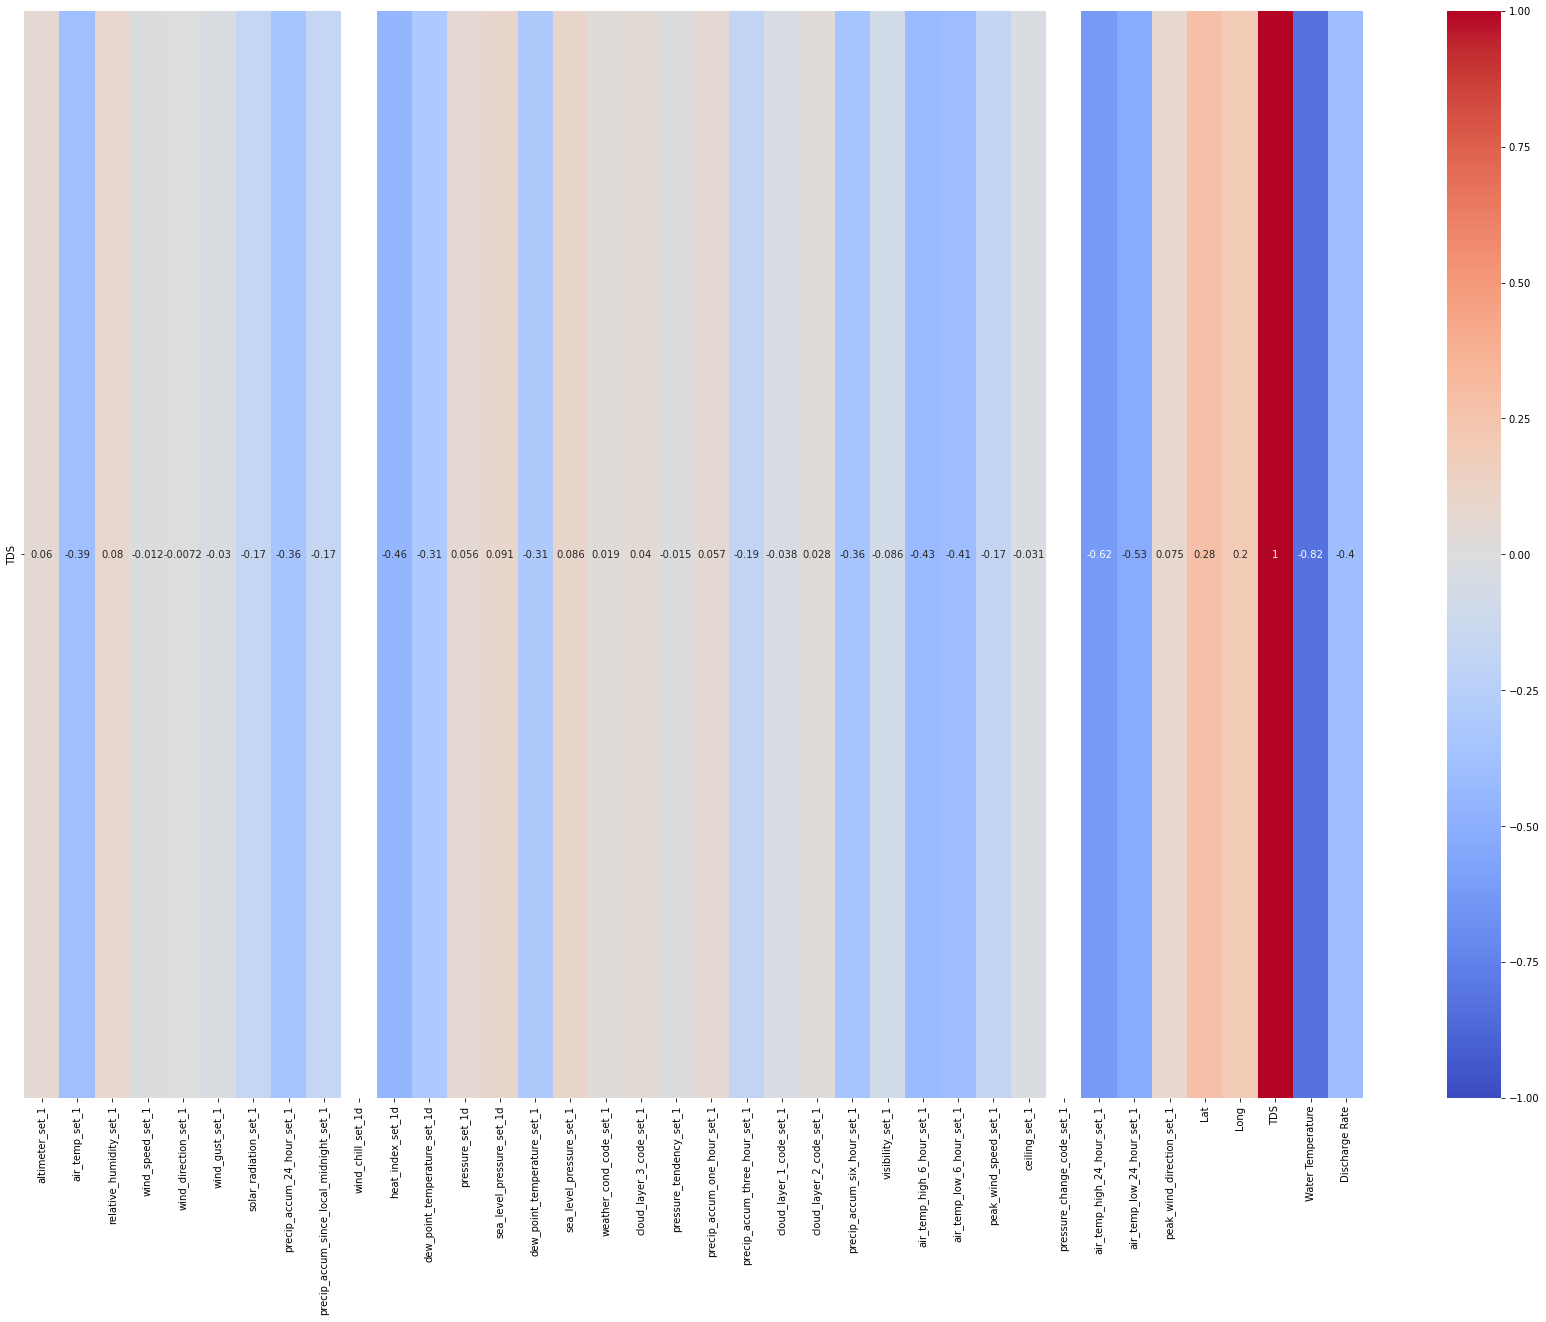

In [30]:
# Plotting the heatmap for the 'TDS' correlation
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = final_df.select_dtypes(include='number')
tds_corr = numeric_df.corr().loc[['TDS'], :]

plt.figure(figsize=(30, 20))
sns.heatmap(tds_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Display the heatmap
plt.show()

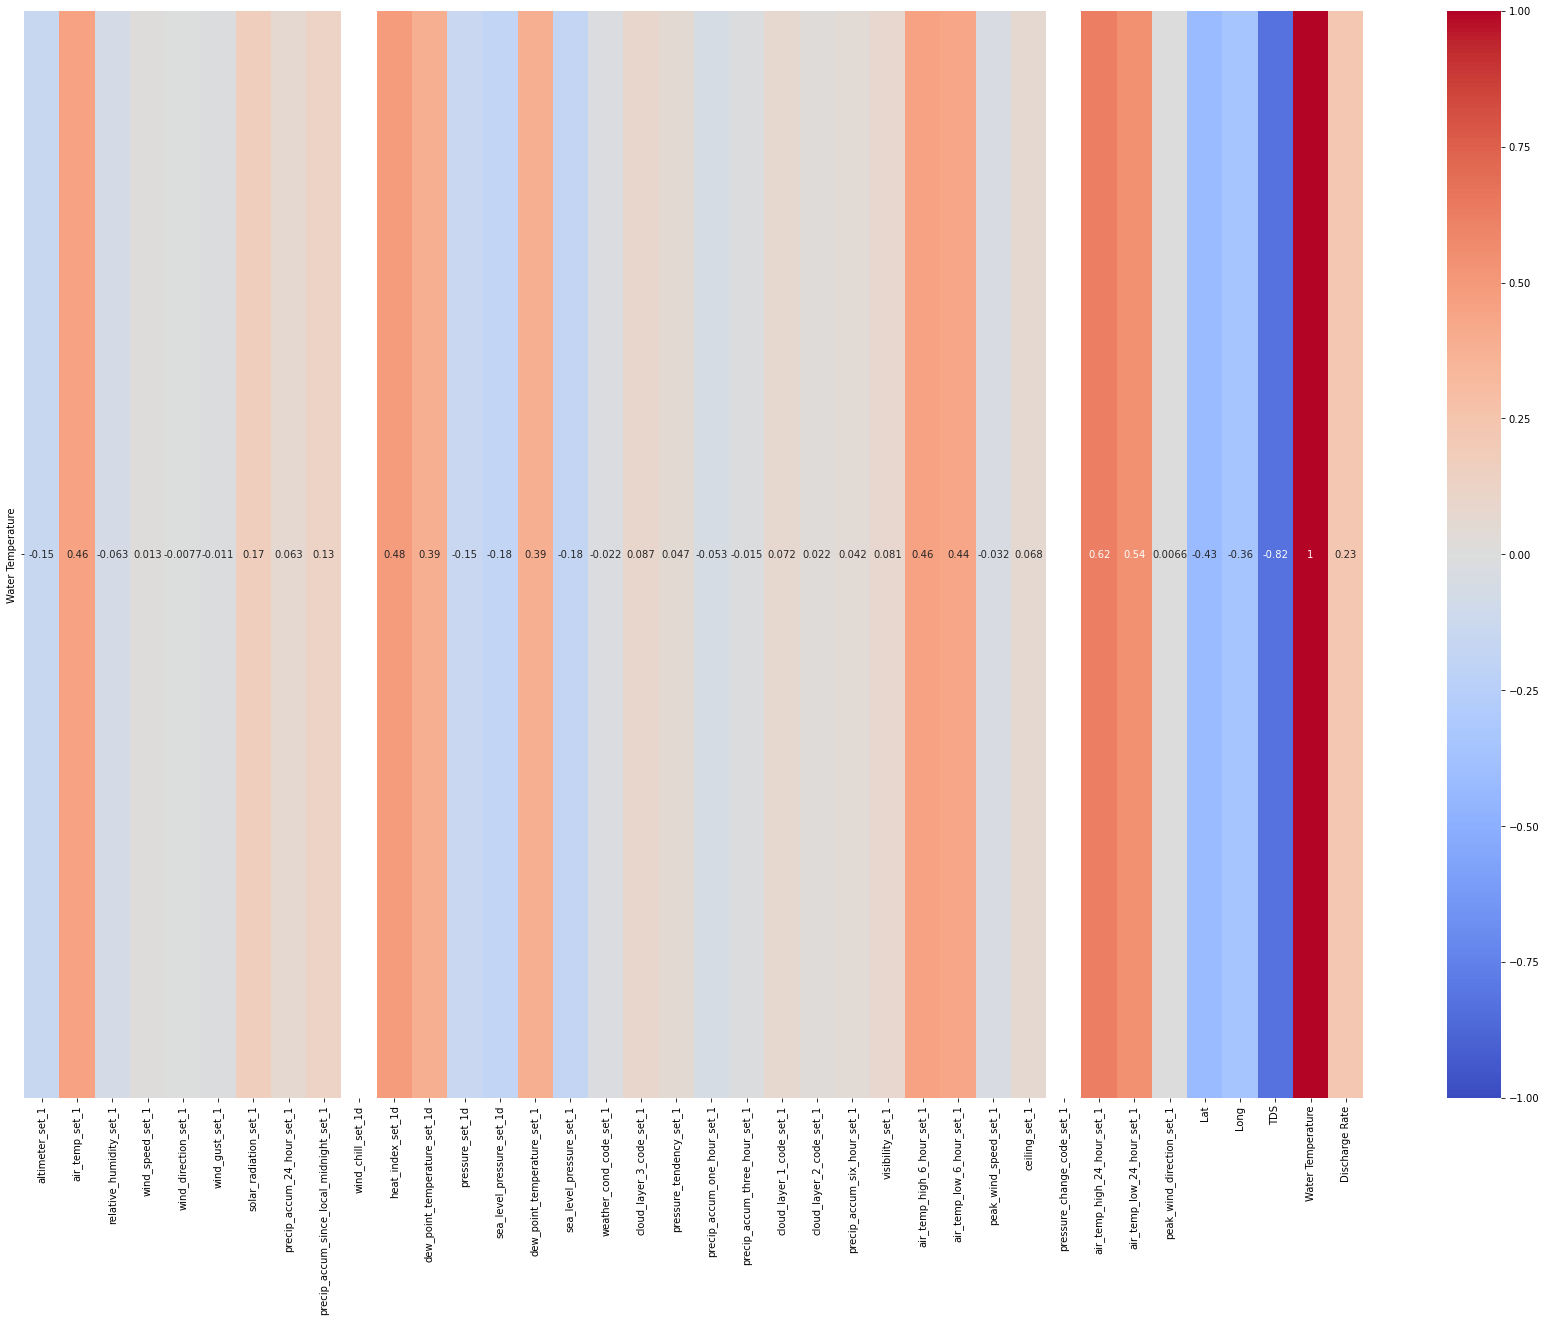

In [31]:
numeric_df = final_df.select_dtypes(include='number')
waterTemp_corr = numeric_df.corr().loc[['Water Temperature'], :]
plt.figure(figsize=(30, 20))
sns.heatmap(waterTemp_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.show()

In [32]:
tds_corr = numeric_df.corr()['TDS'].drop('TDS')
tds_top_10_features = tds_corr.abs().sort_values(ascending=False).head(10).index.tolist()
print("Top 10 features affecting 'TDS' are:", tds_top_10_features)

Top 10 features affecting 'TDS' are: ['Water Temperature', 'air_temp_high_24_hour_set_1', 'air_temp_low_24_hour_set_1', 'heat_index_set_1d', 'air_temp_high_6_hour_set_1', 'air_temp_low_6_hour_set_1', 'Discharge Rate', 'air_temp_set_1', 'precip_accum_24_hour_set_1', 'precip_accum_six_hour_set_1']


In [33]:
waterTemp_corr = numeric_df.corr()['Water Temperature'].drop('Water Temperature')
waterTemp_top_10_features = waterTemp_corr.abs().sort_values(ascending=False).head(10).index.tolist()
print("Top 10 features affecting 'Water Temperature' are:", waterTemp_top_10_features)

Top 10 features affecting 'Water Temperature' are: ['TDS', 'air_temp_high_24_hour_set_1', 'air_temp_low_24_hour_set_1', 'heat_index_set_1d', 'air_temp_set_1', 'air_temp_high_6_hour_set_1', 'air_temp_low_6_hour_set_1', 'Lat', 'dew_point_temperature_set_1d', 'dew_point_temperature_set_1']


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Assuming final_df is defined
# We'll simulate it here with random data for demonstration purposes

# Step 1: Select numeric columns
numeric_columns = final_df.select_dtypes(include=['number']).columns.tolist()

# Step 2: Remove 'TDS' and 'Water Temperature' if they are in numeric_columns
features_to_exclude = ['TDS', 'Water Temperature']
numeric_features = [col for col in numeric_columns if col not in features_to_exclude]

# Step 3: Use LabelEncoder to encode string columns
le = LabelEncoder()
encoded_columns = final_df.select_dtypes(include=['object']).apply(le.fit_transform)

# Step 4: Concatenate the encoded string columns back to the numeric DataFrame
X = pd.concat([final_df[numeric_features], encoded_columns], axis=1)
y = final_df[features_to_exclude]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the RandomForestRegressor
regressor = RandomForestRegressor(random_state=42)

# Training the model
regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = regressor.predict(X_test)

# Computing the Mean Squared Error (MSE) for both outputs
mse_tds = mean_squared_error(y_test['TDS'], y_pred[:, 0])
mse_temp = mean_squared_error(y_test['Water Temperature'], y_pred[:, 1])

print(f"Mean Squared Error for TDS: {mse_tds}")
print(f"Mean Squared Error for Water Temperature: {mse_temp}")

# Compute the R^2 score for both outputs
r2_tds = r2_score(y_test['TDS'], y_pred[:, 0])
r2_temp = r2_score(y_test['Water Temperature'], y_pred[:, 1])

print(f"R^2 Score for TDS: {r2_tds}")
print(f"R^2 Score for Water Temperature: {r2_temp}")

# To see the feature importances, you'll need to average over all the trees in the forest
feature_names = X.columns.tolist()  # Assuming 'X' is the DataFrame used to train the model

# Get importances from the model
importances = regressor.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Print the feature importances, sorted by importance
print(importance_df.sort_values(by='Importance', ascending=False))

Mean Squared Error for TDS: 1.5083460726444329
Mean Squared Error for Water Temperature: 0.010470778210967858
R^2 Score for TDS: 0.9993581764744236
R^2 Score for Water Temperature: 0.9984742623170055
                                    Feature    Importance
30              air_temp_high_24_hour_set_1  3.924483e-01
8   precip_accum_since_local_midnight_set_1  2.937997e-01
27                    peak_wind_speed_set_1  1.184838e-01
7                precip_accum_24_hour_set_1  7.076165e-02
31               air_temp_low_24_hour_set_1  3.666740e-02
20            precip_accum_three_hour_set_1  2.171495e-02
38                              metar_set_1  1.838750e-02
6                     solar_radiation_set_1  1.374825e-02
5                           wind_gust_set_1  6.676079e-03
19              precip_accum_one_hour_set_1  5.745092e-03
16                  weather_cond_code_set_1  5.143434e-03
23              precip_accum_six_hour_set_1  2.965185e-03
17                 cloud_layer_3_code_set_1  2

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Since you're performing regression, let's use MSE and R^2 as our scoring metrics
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform 10-fold cross-validation for MSE
mse_scores = cross_val_score(regressor, X, y, cv=10, scoring=mse_scorer)

# Perform 10-fold cross-validation for R^2
r2_scores = cross_val_score(regressor, X, y, cv=10, scoring=r2_scorer)

# The scores are negated when using MSE (because cross_val_score always tries to maximize the score)
# So we'll negate them back to get positive MSE values30              air_temp_high_24_hour_set_1  3.924483e-0130              air_temp_high_24_hour_set_1  3.924483e-01
mse_scores = -mse_scores

print(f"10-fold Cross-Validated MSE for TDS and Water Temperature: {mse_scores}")
print(f"10-fold Cross-Validated R^2 for TDS and Water Temperature: {r2_scores}")

# Calculate and print the mean and standard deviation of the scores
print(f"Mean Cross-Validated MSE: {mse_scores.mean()}, Standard Deviation: {mse_scores.std()}")
print(f"Mean Cross-Validated R^2: {r2_scores.mean()}, Standard Deviation: {r2_scores.std()}")


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the random forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]        # Method of selecting samples for training each tree
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Use the best parameters to initialize a new model
best_regressor = RandomForestRegressor(**best_params)

# Fit the new model
best_regressor.fit(X_train, y_train)

# Make predictions with the new model
y_pred_best = best_regressor.predict(X_test)

# Evaluate the new model
mse_tds_best = mean_squared_error(y_test['TDS'], y_pred_best[:, 0])
mse_temp_best = mean_squared_error(y_test['Water Temperature'], y_pred_best[:, 1])
r2_tds_best = r2_score(y_test['TDS'], y_pred_best[:, 0])
r2_temp_best = r2_score(y_test['Water Temperature'], y_pred_best[:, 1])

print(f"Improved Mean Squared Error for TDS: {mse_tds_best}")
print(f"Improved Mean Squared Error for Water Temperature: {mse_temp_best}")
print(f"Improved R^2 Score for TDS: {r2_tds_best}")
print(f"Improved R^2 Score for Water Temperature: {r2_temp_best}")
